In [763]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [764]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# exception feature : Passengerid, Name, Ticket, Cabin

In [765]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [775]:
print(train.head())
pd.get_dummies(train['Embarked'])
print(train.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [614]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [615]:
def bar_chart(feature):
    Survived = train[train['Survived'] == 1][feature].value_counts()
    Dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([Survived,Dead])
    df.index = ['Survived','Dead']
    df.plot(kind ='bar', stacked = True)

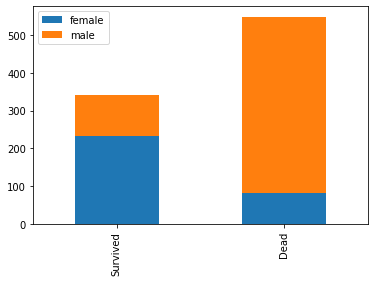

In [616]:
bar_chart('Sex')


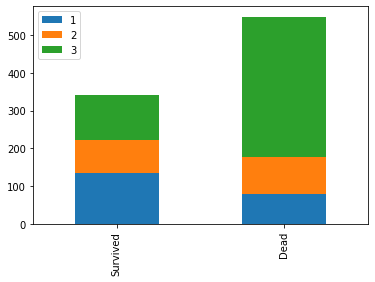

In [617]:
bar_chart('Pclass')

In [618]:

print(train.isnull().sum())  #missing value
print("=====Test Missing value=====")
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
=====Test Missing value=====
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [619]:
#이름을 통한 나이 예측 mr나 mrs등의 풀네임에서 나이를 추측할 수 있음

for data in train:
    train['Name_part'] = train.Name.str.extract('([A-Za-z]+)\.',expand = False)

    
pd.crosstab(train['Name_part'], train['Sex'])  #miss,Mrs 여성, Dr,Master,Mr,Rev 남성으로 간주

#마찬가지로 숫자로 맵핑 헷갈리지 않도록 여성을 앞으로 



Sex,female,male
Name_part,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [620]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_part
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [621]:

train['Name_part'] = train['Name_part'].replace(['Capt','Col'],'Minor')
train['Name_part'] = train['Name_part'].replace(['Ms','Lady'],'Miss')
train['Name_part'] = train['Name_part'].replace(['Mme','Mlle','Countess'],'Mrs')
train['Name_part'] = train['Name_part'].replace(['Rev','Jonkheer','Major','Sir','Don'],'Mr')

pd.crosstab(train['Name_part'], train['Sex'])


for Name_partition, age in train.groupby('Name_part')['Age'].median().iteritems():
    print(Name_partition, age)
    train.loc[(train['Name_part']==Name_partition)&(train['Age'].isnull()), 'Age'] = age

Dr 46.5
Master 3.5
Minor 60.0
Miss 21.0
Mr 30.0
Mrs 34.5


In [622]:
for N_partition,age in train.groupby('Name_part')['Age'].median().iteritems():
    print(N_partition, age)
    train.loc[(train['Name_part']==N_partition) & (train['Age'].isnull()), 'Age'] = age


Dr 46.5
Master 3.5
Minor 60.0
Miss 21.0
Mr 30.0
Mrs 34.5


In [623]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_part
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [624]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)  # 고려하지 않은 정보 삭제

In [625]:
print(train.isnull().sum())  #missing value 재 측정 

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     2
Name_part    0
dtype: int64


In [626]:
print(train[train["Embarked"] == 'S'].shape[0])  #(Embarked 값 2개를 확률적으로  S로 간주)
print(train[train["Embarked"] == 'Q'].shape[0])
print(train[train["Embarked"] == 'C'].shape[0])

644
77
168


In [627]:
train = train.fillna({"Embarked" : 'S'})

In [628]:
print(train[train["Embarked"] == 'S'].shape[0])  #(Embarked 값 2개를 확률적으로  S로 간주)
print(train[train["Embarked"] == 'Q'].shape[0])
print(train[train["Embarked"] == 'C'].shape[0])

646
77
168


In [629]:
embarked_number = {'S' : 1, 'Q' : 2, 'C' : 3}                      #embarked 넘버링
train['Embarked'] = train['Embarked'].map(embarked_number)
test['Embarked'] = test['Embarked'].map(embarked_number)

In [630]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_part
0,0,3,male,22.0,1,0,7.2500,1,Mr
1,1,1,female,38.0,1,0,71.2833,3,Mrs
2,1,3,female,26.0,0,0,7.9250,1,Miss
3,1,1,female,35.0,1,0,53.1000,1,Mrs
4,0,3,male,35.0,0,0,8.0500,1,Mr


In [631]:
sex_number = {'female' : 0,'male' : 1}   #female 0 male 1로 넘버링
train['Sex'] = train['Sex'].map(sex_number)
test['Sex'] = test['Sex'].map(sex_number)

In [632]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_part
0,0,3,1,22.0,1,0,7.2500,1,Mr
1,1,1,0,38.0,1,0,71.2833,3,Mrs
2,1,3,0,26.0,0,0,7.9250,1,Miss
3,1,1,0,35.0,1,0,53.1000,1,Mrs
4,0,3,1,35.0,0,0,8.0500,1,Mr


In [633]:
train['Age'] = train['Age'].fillna(-0.5)




df = train[train['Age'].isnull()] # age결측치 내용

bins = [-1, 0, 5, 13, 19, 60 , 200]
labels = ['UNK', 'Baby', 'Child', 'Teenager','Adult','Senior']
train['Age_Group'] = pd.cut(train['Age'], bins, labels = labels)


In [634]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_part,Age_Group
0,0,3,1,22.0,1,0,7.2500,1,Mr,Adult
1,1,1,0,38.0,1,0,71.2833,3,Mrs,Adult
2,1,3,0,26.0,0,0,7.9250,1,Miss,Adult
3,1,1,0,35.0,1,0,53.1000,1,Mrs,Adult
4,0,3,1,35.0,0,0,8.0500,1,Mr,Adult


In [635]:
age_number = {'UNK':0, 'Baby' : 1,'Child' : 2, 'Teenager' : 3, 'Adult' : 4, 'Senior':5}
train['Age_Group'] = train['Age_Group'].map(age_number)
train = train.drop(['Age'], axis = 1)



train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Name_part,Age_Group
0,0,3,1,1,0,7.2500,1,Mr,4
1,1,1,0,1,0,71.2833,3,Mrs,4
2,1,3,0,0,0,7.9250,1,Miss,4
3,1,1,0,1,0,53.1000,1,Mrs,4
4,0,3,1,0,0,8.0500,1,Mr,4


In [636]:
train.head(50)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Name_part,Age_Group
0,0,3,1,1,0,7.2500,1,Mr,4
1,1,1,0,1,0,71.2833,3,Mrs,4
2,1,3,0,0,0,7.9250,1,Miss,4
3,1,1,0,1,0,53.1000,1,Mrs,4
4,0,3,1,0,0,8.0500,1,Mr,4
5,0,3,1,0,0,8.4583,2,Mr,4
6,0,1,1,0,0,51.8625,1,Mr,4
7,0,3,1,3,1,21.0750,1,Master,1
8,1,3,0,0,2,11.1333,1,Mrs,4
9,1,2,0,1,0,30.0708,3,Mrs,3


In [637]:
train['Fare'] = pd.qcut(train['Fare'], 5, labels = [1,2,3,4,5])

In [638]:
train.head(50)
train = train.drop('Name_part', axis =1 )

In [639]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_Group
0,0,3,1,1,0,1,1,4
1,1,1,0,1,0,5,3,4
2,1,3,0,0,0,2,1,4
3,1,1,0,1,0,5,1,4
4,0,3,1,0,0,2,1,4


In [640]:
train['Family'] = train['Parch']+train['SibSp']

In [641]:
train = train.drop('SibSp',axis = 1)
train = train.drop('Parch',axis = 1)

In [722]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score






In [729]:
x = train.drop('Survived', axis =1)
y = train['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 40)


In [724]:
Logistic_model = LogisticRegression(random_state=30)
Logistic_model.fit(x_train,y_train)
Logistic_pred = Logistic_model.predict(x_test)

print("Accuracy : ",(accuracy_score(y_test,Logistic_pred)))



Accuracy :  0.8134328358208955


In [726]:

Logistic_model = LogisticRegression(random_state=30,max_iter=40)
Logistic_model.fit(x_train,y_train)
Logistic_pred = Logistic_model.predict(x_test)

print("Accuracy : ",(accuracy_score(y_test,Logistic_pred)))


Accuracy :  0.8134328358208955


In [728]:

Logistic_model = LogisticRegression(random_state=30,max_iter=60,C=3)
Logistic_model.fit(x_train,y_train)
Logistic_pred = Logistic_model.predict(x_test)

print("Accuracy : ",(accuracy_score(y_test,Logistic_pred)))


Accuracy :  0.8134328358208955


In [730]:
model = LogisticRegression()

model.fit(x_train,)
prediction = model.predict(x_test)
cr = classification_report(y_test,prediction,output_dict=True)
print('Accuracy = ', cr['accuracy'])


Accuracy =  0.8134328358208955


In [743]:
def train_model(model):
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test,prediction)
    print("Accuracy : ", accuracy,"%")
    return prediction

    

In [744]:
Log_prediction = train_model(LogisticRegression(max_iter=100))

Accuracy :  0.8134328358208955 %


In [745]:
Log_prediction = train_model(LogisticRegression(max_iter=20))

Accuracy :  0.8171641791044776 %


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [746]:
Log_prediction = train_model(LogisticRegression(max_iter=40))

Accuracy :  0.8134328358208955 %


In [747]:
Log_prediction = train_model(LogisticRegression(max_iter=60))

Accuracy :  0.8134328358208955 %


In [748]:
Log_prediction = train_model(LogisticRegression(max_iter=80))

Accuracy :  0.8134328358208955 %


In [749]:
Log_prediction = train_model(LogisticRegression(max_iter=100))

Accuracy :  0.8134328358208955 %


In [750]:
Log_prediction = train_model(LogisticRegression(max_iter=100,C=1.0))

Accuracy :  0.8134328358208955 %


In [751]:
Log_prediction = train_model(LogisticRegression(max_iter=100,C=2.0))

Accuracy :  0.8134328358208955 %


In [752]:
Log_prediction = train_model(LogisticRegression(max_iter=100,C=3.0))

Accuracy :  0.8134328358208955 %


In [753]:
Log_prediction = train_model(LogisticRegression(max_iter=100,C=4.0))

Accuracy :  0.8134328358208955 %


In [754]:
KNN_prediction = train_model(KNeighborsClassifier(n_neighbors=1))


Accuracy :  0.7164179104477612 %


In [755]:
KNN_prediction = train_model(KNeighborsClassifier(n_neighbors=2))

Accuracy :  0.7798507462686567 %


In [756]:
KNN_prediction = train_model(KNeighborsClassifier(n_neighbors=3))

Accuracy :  0.8208955223880597 %


In [757]:
KNN_prediction = train_model(KNeighborsClassifier(n_neighbors=4))

Accuracy :  0.8171641791044776 %


In [761]:
KNN_prediction = train_model(KNeighborsClassifier(n_neighbors=5))

Accuracy :  0.8283582089552238 %


In [760]:
DT_prediction = train_model(DecisionTreeClassifier(random_state=40))

Accuracy :  0.8097014925373134 %


0

In [ ]:
def train_model(model):
    model.fit(train_set, )

In [553]:
print(train[(train['Age_Group']=='Adult') & (train['Survived']==0) & (train['Sex']==1)].count()) # 성인 남성중에 죽은 사람
print(train[(train['Age_Group']=='Adult') & (train['Survived']==1) & (train['Sex']==1)].count())
print(train[(train['Age_Group']=='Adult') & (train['Survived']==0) & (train['Sex']==0)].count()) #성인 여성중에 죽은 사람
print(train[(train['Age_Group']=='Adult') & (train['Survived']==1) & (train['Sex']==0)].count())
print(train[(train['Age_Group']=='Senior') & (train['Survived']==0) & (train['Sex']==0)].count())#노인 여성 중에 죽은사람

print(train[(train['Age_Group']=='Adult') & (train['Survived']==1)].count())
print(train[train['Age_Group']=='Baby'].count())
print(train[train['Age_Group']=='Child'].count())

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Name_part    0
Age_Group    0
dtype: int64
Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Name_part    0
Age_Group    0
dtype: int64
Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Name_part    0
Age_Group    0
dtype: int64
Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Name_part    0
Age_Group    0
dtype: int64
Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Name_part    0
Age_Group    0
dtype: int64
Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Name_part    0
Age_Group    0
dtype: int64
Survived     0
Pclass 

In [762]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.
